In [ ]:
# 할당된 GPU 실행
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus:
  try:
    # GPU 메모리 사용 설정
    tf.config.experimental.set_memory_growth(gpus[0], True)  
  except RuntimeError as re:
    print(re)

# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

# 라이브러리 설치


In [ ]:
# 사운드처리 라이브러리
# !pip install librosa

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

# 데이터 로드

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/'

In [ ]:
# 소리데이터 읽기
wav, sr = librosa.load(data_dir + "test_voice.wav")

# wav, sr = librosa.load(data_dir + "test_voice.wav", sr = 임의 지정 가능)  sr지정하면 소리가 나오는 속도 조절 가능? (음악의 분위기도 바꿀 수 있음)


#t 소리데이터 정보 출력
print(sr)   # 초당 데이터 수?
print(wav.shape)   # 전체 데이터 수?
print(wav.shape[0]/float(sr))   # 3.05초의 플레이타임을 갖는 소리데이터


22050
(67253,)
3.0500226757369613


In [ ]:
# 총 67253개의 데이터로 구성되어 있고, 초당 22050 개의 데이터로 구성

In [ ]:
# 소리 데이터 플레이

IPython.display.Audio(data=wav, rate=sr)  # sr는 샘플링 레이트

Text(0, 0.5, 'AMP')

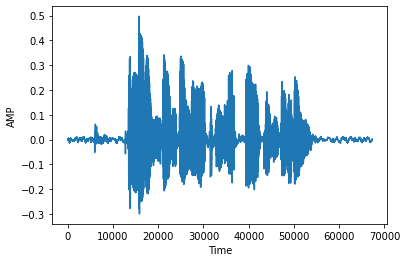

In [ ]:
# 소리 데이터 시각화
plt.plot(wav)
plt.xlabel("Time")
plt.ylabel('AMP')

Text(0, 0.5, 'AMP')

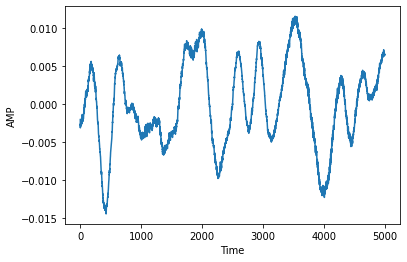

In [ ]:
# 일부 시간축 데이터만 출력
plt.plot(wav[:5000])
plt.xlabel("Time")
plt.ylabel('AMP')

In [ ]:
# 사람의 목소리를 구분할 때 목소리의 크기로 할 수 없음 -> 진폭은 사람의 특성이라고 볼 수 없음
# 사람의 목소리는 주파수로 바꿔서 봐야함
# 소리의 주파수는 초당 얼마나 진동하는지 나타나는 파형으로
# 파가 많으면 고주파(높은소리 하이톤), 파가 적으면 저주파(낮은 저음)
# 사람의 목소리마다 가지는 주파수의 갯수가 다 다름 (성대구조때문)

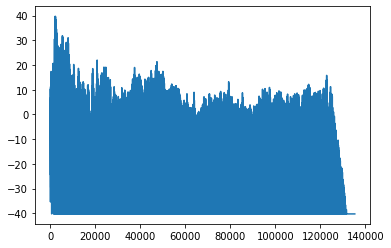

In [ ]:
# 주파수 영역으로 변환 (FT : Fourier 변환)
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav)))

plt.plot(dB.flatten())

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=30
  n_fft, y.shape[-1]


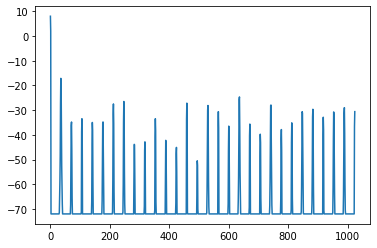

In [ ]:
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav[:30])))

plt.plot(dB.flatten())

## Melspectrum : 소리 데이터를 샘플링할 때 저주파부분은 샘플링 간격을 짧게해서 많이하고, 고주파 부분은 길게 샘플링해서 적게 샘플링 

- 사람 귀의 특성을 반영한 것(낮은 음은 잘 듣는데 높은 음으로 갈수록 잘 못 듣는 경향)
- 소리 데이터가 이미지 데이터로 변환되는 효과


- (무지개 색도 주파수로 구분되는 것 처럼 소리의 주파수로 색 매칭 가능하긴함)

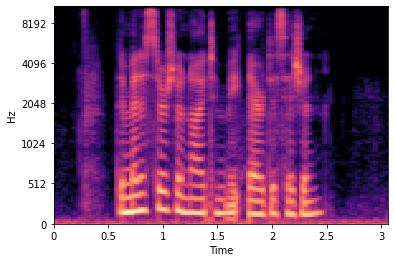

In [ ]:
# n_mels : 멜 스펙트럼의 수 (세로축의 눈금 수)
# 시간별 소리의 크기, 주파수, 성분을 시각화
S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)

# 시각화
log_S = librosa.power_to_db(S, ref = np.max)
librosa.display.specshow(log_S, sr=sr, x_axis="time", y_axis="mel")

# 밝은 색은 소리가 큰 것, 어두운 색은 소리가 작은것, 검정색은 소리가 없는 것
# y축은 주파수(위로갈수록 높고 아래로갈수록 낮음), X축은

# 자장가 데이터 셋

In [ ]:
# 데이터 로드

In [ ]:
# 소리데이터 읽기
wav1, sr1 = librosa.load(data_dir + "섬집아기.wav")
wav2, sr2 = librosa.load(data_dir + "섬집아기_반주.wav")
wav3, sr3 = librosa.load(data_dir + "모차르트자장가.wav")
wav4, sr4 = librosa.load(data_dir + "모차르트_자장가_반주.wav")

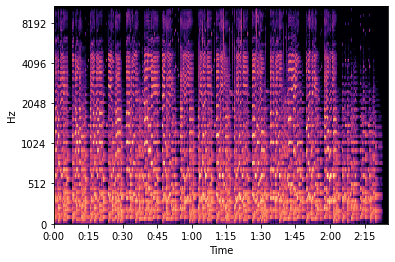

In [ ]:
S1 = librosa.feature.melspectrogram(wav1, sr=sr1, n_mels=128)

# 시각화
log_S1 = librosa.power_to_db(S1, ref = np.max)
librosa.display.specshow(log_S1, sr=sr1, x_axis="time", y_axis="mel")

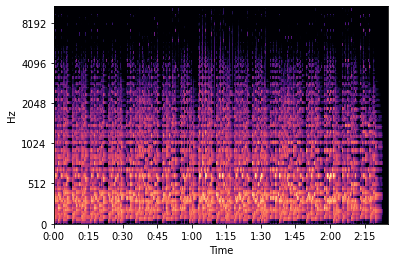

In [ ]:
S2 = librosa.feature.melspectrogram(wav2, sr=sr2, n_mels=128)

# 시각화
log_S2 = librosa.power_to_db(S2, ref = np.max)
librosa.display.specshow(log_S2, sr=sr2, x_axis="time", y_axis="mel")

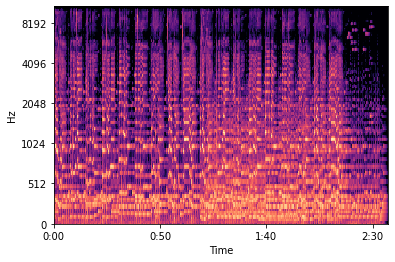

In [ ]:
S3 = librosa.feature.melspectrogram(wav3, sr=sr3, n_mels=128)

# 시각화
log_S3 = librosa.power_to_db(S3, ref = np.max)
librosa.display.specshow(log_S3, sr=sr3, x_axis="time", y_axis="mel")

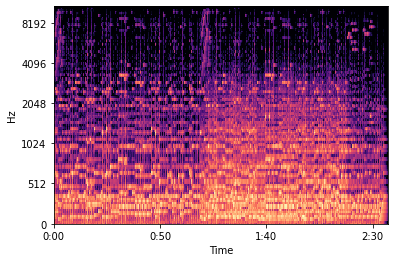

In [ ]:
S4 = librosa.feature.melspectrogram(wav4, sr=sr4, n_mels=128)

# 시각화
log_S4 = librosa.power_to_db(S4, ref = np.max)
librosa.display.specshow(log_S4, sr=sr4, x_axis="time", y_axis="mel")

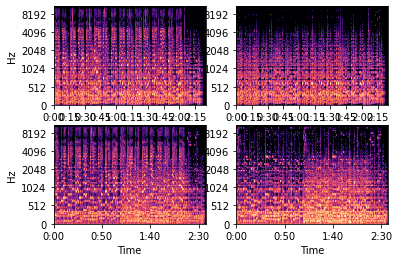

In [ ]:
plt.subplot(2,2,1)
log_S1 = librosa.power_to_db(S1, ref = np.max)
librosa.display.specshow(log_S1, sr=sr1, x_axis="time", y_axis="mel")
plt.subplot(2,2,2)
log_S2 = librosa.power_to_db(S2, ref = np.max)
librosa.display.specshow(log_S2, sr=sr2, x_axis="time", y_axis="mel")
plt.subplot(2,2,3)
log_S3 = librosa.power_to_db(S3, ref = np.max)
librosa.display.specshow(log_S3, sr=sr3, x_axis="time", y_axis="mel")
plt.subplot(2,2,4)
log_S4 = librosa.power_to_db(S4, ref = np.max)
librosa.display.specshow(log_S4, sr=sr4, x_axis="time", y_axis="mel")

In [ ]:
# matplotlib은 matplotlib으로 구현하든 그냥 이미지든 그냥 지도든 시본으로 구현하든 상관없이 
# 넘파이 배열이면 시각화 가능

## MFCC : Melspectrum을 디지털로 변환한 것

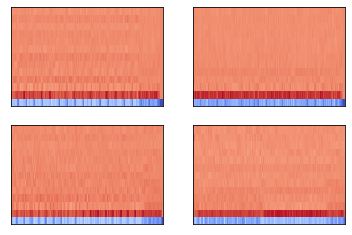

In [ ]:
# mfcc : 
# n_mfcc : 세로 축 눈금 수

plt.subplot(2,2,1)
mfcc1 = librosa.feature.mfcc(S = log_S1, n_mfcc=13)
librosa.display.specshow(mfcc1)

plt.subplot(2,2,2)
mfcc2 = librosa.feature.mfcc(S = log_S2, n_mfcc=13)
librosa.display.specshow(mfcc2)

plt.subplot(2,2,3)
mfcc3 = librosa.feature.mfcc(S = log_S3, n_mfcc=13)
librosa.display.specshow(mfcc3)

plt.subplot(2,2,4)
mfcc4 = librosa.feature.mfcc(S = log_S4, n_mfcc=13)
librosa.display.specshow(mfcc4)

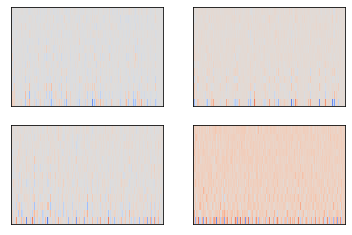

In [ ]:
# order 값으로 2차 미분(일정한 값으로 2번나눔)
plt.subplot(2,2,1)
mfcc12 = librosa.feature.delta(mfcc1, order=2)
librosa.display.specshow(mfcc12)
plt.subplot(2,2,2)
mfcc22 = librosa.feature.delta(mfcc2, order=2)
librosa.display.specshow(mfcc22)
plt.subplot(2,2,3)
mfcc32 = librosa.feature.delta(mfcc3, order=2)
librosa.display.specshow(mfcc32)
plt.subplot(2,2,4)
mfcc42 = librosa.feature.delta(mfcc4, order=2)
librosa.display.specshow(mfcc42)

# Melspectrum은 우리 눈으로 보기 더 편함 MFCC는 컴퓨터로 학습시키기 더 편함

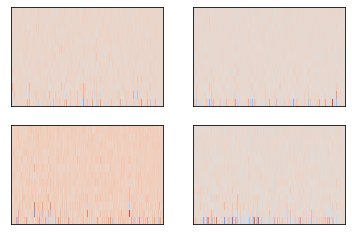

In [ ]:
# order 값으로 3차 미분(일정한 값으로 3번 나눔)
plt.subplot(2,2,1)
mfcc13 = librosa.feature.delta(mfcc1, order=3)
librosa.display.specshow(mfcc13)
plt.subplot(2,2,2)
mfcc23 = librosa.feature.delta(mfcc2, order=3)
librosa.display.specshow(mfcc23)
plt.subplot(2,2,3)
mfcc33 = librosa.feature.delta(mfcc3, order=3)
librosa.display.specshow(mfcc33)
plt.subplot(2,2,4)
mfcc43 = librosa.feature.delta(mfcc4, order=3)
librosa.display.specshow(mfcc43)

# 아기 울음소리 인식

- 169개의 훈련데이터와 89개의 테스트데이터로 구성
- 울음소리 종류 : 울음(crying), 웃음(laugh), 조용(silence)
- 파일 이름 : 종류(인덱스).wav


- 학습내용  
  (1) 사운드 데이터를 DNN으로 학습해서 울음소리 인식  
  (2) 사운드 데이터를 Conv1D로 학습해서 울음소리 인식  
  (3) 사운드 데이터를 MFCC로 변환해서 Conv2D로 학습해서 울음소리 인식

# ANN DNN CNN RNN
- SLP : 단층 퍼셉트론
_ MLP : 다층 퍼셉트론
- ANN : 인공 신경망 (은닉층 1개)
- DNN : 심층 신경망 (은닉층이 2개 이상)
- CNN : 합성곱 신경망
- RNN : 순환 신경망

In [ ]:
X_train = []
X_test = []
y_train = [] 
y_test = []

In [ ]:
# 사운드 데이터(1차원 데이터)를 동일한 길이로 만들어주는 함수
# (사운드 데이터, 길이)
# np.hstack : 세로로 합쳐주는 것
def pad1d(wav, i):
  import numpy as np

  # 사운드 데이터가 i보다 긴 경우 (i에서 짤라버림?)
  if wav.shape[0] > i:
    return wav[:i]

  # 사운드 데이터가 i보다 짧은 경우 (빈 공간 0으로 채워줌)
  else:
    return np.hstack(wav, np.zeros(i - wav.shape[0]))


#MFCC 데이터(2차원 데이터)를 동일한 크기로 만들어주는 함수
def pad2d(wav, i):
  import numpy as np
  if wav.shape[1] > i:  # ([1]은 열의 수 받아오는 것)
      return wav[:, :i]
  else:
    return np.hstack(wav. np.zeros(wav.shape[0], i - wav.shape[1]))

In [ ]:
list1 = [[[0,0,0,0],
        [0,0,0,0]],
        [[0,0,0,0],
        [0,0,0,0]],
        [[0,0,0,0],
        [0,0,0,0]]]

import numpy as np

arr1 = np.array(list1)

arr1.shape  #(데이터개수 , 행 , 열)

(3, 2, 4)

## 폴더에 있는 사운드 데이터를 특성데이터와 라벨데이터로 저장

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

data_dir = '/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/baby_sound/'

train_dir = data_dir + 'train/'
test_dir = data_dir + 'test/'

# train 폴더의 사운드 파일을 읽어서 wav를 특성데이터로 저장하고 파일명을 라벨데이터로 저장

# os.listdir : 해당되는 폴더명과 파일명을 다 가지고 옴
for fname in os.listdir(train_dir) :
  
  # wav 파일이 아닌 경우 아무런 처리 하지 않음
  if ".wav" not in fname:
    continue
  
  # 파일이름 라벨데이터에 저장(3개의 라벨 : crying, laugh, silence)
  # 파일이름 : 울음종류 (인덱스).wav
  label = fname.split(" ")[0]   #파일이름을 빈공백으로 자르고 0번 인덱스를 라벨 변수에 담음
  y_train.append(label)

  #사운드 데이터를 같은 길이로 만들어서 특성 데이터로 저장
  wav, sr = librosa.load(train_dir + fname)

  pad_x = pad1d(wav, 30000)
  X_train.append(pad_x)

In [ ]:
# test

for fname in os.listdir(test_dir) :
  
  # wav 파일이 아닌 경우 아무런 처리 하지 않음
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]   
  y_test.append(label)

  #사운드 데이터를 같은 길이로 만들어서 특성 데이터로 저장
  wav, sr = librosa.load(test_dir + fname)

  pad_x = pad1d(wav, 30000)
  X_test.append(pad_x)

In [ ]:
#가로로 정렬되어 있는 리스트 데이터를 배열의 행 데이터로 변환
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

X_train.shape, X_test.shape

# np.array(X_train)으로 배열형태로 바꿔도 됨

((169, 30000), (89, 30000))

In [ ]:
# y를 원핫 인코딩
import pandas as pd

y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

y_train_en.shape, y_test_en.shape

((169, 3), (89, 3))

## (1) 사운드 데이터를 DNN으로 학습하기


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

#입력층
model1.add(Dense(512,input_dim=30000,activation='relu'))
model1.add(Dropout(0.3))

#은닉층
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))

#출력층
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [ ]:
h1 = model1.fit(X_train, y_train_en, epochs=10, batch_size=32, validation_data=(X_test, y_test_en))

Epoch 1/10
6/6 [==============================] - 2s 150ms/step - loss: 1.2855 - accuracy: 0.3373 - val_loss: 0.8177 - val_accuracy: 0.4270
Epoch 2/10
6/6 [==============================] - 1s 104ms/step - loss: 0.8439 - accuracy: 0.4793 - val_loss: 0.6974 - val_accuracy: 0.4270
Epoch 3/10
6/6 [==============================] - 1s 106ms/step - loss: 0.8577 - accuracy: 0.5562 - val_loss: 0.6783 - val_accuracy: 0.5730
Epoch 4/10
6/6 [==============================] - 1s 107ms/step - loss: 0.6145 - accuracy: 0.6923 - val_loss: 0.6616 - val_accuracy: 0.7191
Epoch 5/10
6/6 [==============================] - 1s 108ms/step - loss: 0.6421 - accuracy: 0.8462 - val_loss: 0.6503 - val_accuracy: 0.8202
Epoch 6/10
6/6 [==============================] - 1s 103ms/step - loss: 0.4918 - accuracy: 0.8521 - val_loss: 0.6387 - val_accuracy: 0.8315
Epoch 7/10
6/6 [==============================] - 1s 104ms/step - loss: 0.4370 - accuracy: 0.9112 - val_loss: 0.6145 - val_accuracy: 0.8427
Epoch 8/10
6/6 [====

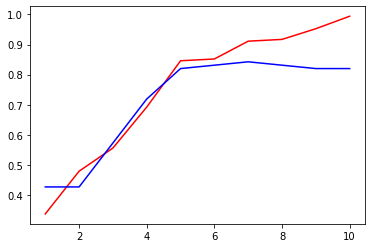

In [ ]:
import matplotlib.pyplot as plt
acc = h1.history["accuracy"]
val_acc = h1.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

In [ ]:
# 예측하기
pred1 = model1.predict(X_test)

print(pred1[0])    
print('-'*50)
print(y_test_en.iloc[0])

3/3 [==============================] - 0s 27ms/step
[3.7767731e-02 1.6186894e-04 9.6207035e-01]
--------------------------------------------------
crying     0
laugh      0
silence    1
Name: 0, dtype: uint8


In [ ]:
# 예측하기
pred1 = model1.predict(X_test)

a = pred1[0][0]
b = pred1[0][1]
c = pred1[0][2]
d = y_test_en.iloc[0][0]
e = y_test_en.iloc[0][1]
f = y_test_en.iloc[0][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

3/3 [==============================] - 0s 28ms/step
predict : silence
predict : silence


## (2) 사운드 데이터를 Conv1D로 학습해서 울음소리 인식

In [ ]:
# Conv1D에 입력하기 위해서 차원을 한층 증가
# 끝인덱스에 차원하나를 증가하겠다는 것 (-1)

X_train_ex = np.expand_dims(X_train, -1)
X_test_ex = np.expand_dims(X_test, -1)

X_train_ex.shape, X_test_ex.shape

((169, 30000, 1), (89, 30000, 1))

In [ ]:
#신경망 설계 
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten

model2 = Sequential()

#특징 추출부
model2.add(Conv1D(filters=64, kernel_size=3,
                  input_shape=(30000,1), activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=3))

model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(GlobalAveragePooling1D())
model2.add(Dropout(0.5))

#분류층
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29998, 64)         256       
                                                                 
 conv1d_1 (Conv1D)           (None, 29996, 64)         12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9998, 64)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 9996, 128)         24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 9994, 128)         49280     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                               

In [ ]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [ ]:
h2 = model2.fit(X_train_ex, y_train_en, epochs=50, batch_size=32, validation_data=(X_test_ex, y_test_en))

Epoch 1/50
6/6 [==============================] - 36s 5s/step - loss: 1.0888 - accuracy: 0.4556 - val_loss: 1.0534 - val_accuracy: 0.7416
Epoch 2/50
6/6 [==============================] - 40s 7s/step - loss: 1.0440 - accuracy: 0.5976 - val_loss: 0.9552 - val_accuracy: 0.7640
Epoch 3/50


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
acc = h2.history["accuracy"]
val_acc = h2.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

In [ ]:
# 예측하기
pred2 = model2.predict(X_test)

a = pred2[84][0]
b = pred2[84][1]
c = pred2[84][2]
d = y_test_en.iloc[84][0]
e = y_test_en.iloc[84][1]
f = y_test_en.iloc[84][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

## (3) 사운드 데이터를 MFCC로 변환해서 Conv2D로 학습해서 울음소리 인식

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

In [ ]:
# 훈련 데이터 변환
import os

for fname in os.listdir(train_dir):
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]
  y_train.append(label)

  wav, sr = librosa.load(train_dir + fname)
  mfcc = librosa.feature.mfcc(wav)

  pad_x = pad2d(mfcc, 40)
  X_train.append(pad_x)

In [ ]:
# 테스트 데이터 변환
for fname in os.listdir(test_dir):
  if ".wav" not in fname:
    continue
  
  label = fname.split(" ")[0]
  y_test.append(label)

  wav, sr = librosa.load(test_dir + fname)
  mfcc = librosa.feature.mfcc(wav)

  pad_x = pad2d(mfcc, 40)
  X_test.append(pad_x)

In [ ]:
# 리스트를 배열로 변환
import pandas as pd

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

X_train.shape, y_train_en.shape, X_test.shape, y_test_en.shape

((169, 20, 40), (169, 3), (89, 20, 40), (89, 3))

In [ ]:
# 색상차원 추가
X_train_ex = np.expand_dims(X_train, -1)
X_test_ex = np.expand_dims(X_test, -1)

X_train_ex.shape, X_test_ex.shape

((169, 20, 40, 1), (89, 20, 40, 1))

In [ ]:
X_train_ex[0].shape

(20, 40, 1)

In [ ]:
#신경망 설계 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential

model3 = Sequential()

#특징 추출부
model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(20, 40, 1)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3)))
model3.add(GlobalAveragePooling2D())
model3.add(Dropout(0.5))

#분류층
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 38, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 18, 38, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 18, 38, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 19, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 17, 64)         36928     
                                                                 
 global_average_pooling2d (G  (None, 64)              

In [ ]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics='accuracy')

In [ ]:
h3 = model3.fit(X_train, y_train_en, epochs=50, batch_size=32, validation_data=(X_test, y_test_en))

In [ ]:
import matplotlib.pyplot as plt
acc = h3.history["accuracy"]
val_acc = h3.history["val_accuracy"]
e = range(1, len(acc)+1)

plt.plot(e, acc, 'r', label='Train')
plt.plot(e, val_acc, 'b', label='Test')
plt.show()

In [ ]:
# 예측하기
pred3 = model3.predict(X_test)

a = pred3[84][0]
b = pred3[84][1]
c = pred3[84][2]
d = y_test_en.iloc[84][0]
e = y_test_en.iloc[84][1]
f = y_test_en.iloc[84][2]

if a>b and a>c:
  print('predict : crying')
elif b>a and b>c:
  print('predict : laugh')
else:
  print('predict : silence')    

if d == 1:
  print('predict : crying')
if e == 1:
  print('predict : laugh')
if f == 1:
  print('predict : silence') 

# STT(Speech To Text)

In [ ]:
# !pip install SpeechRecognition

In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/'

In [ ]:
import speech_recognition as sr
# 음악소리 때문에 발음이 뭉개지니까 음성만 있으면 더 잘나옴

file_path = dir_path + "모차르트자장가.wav"

# 초기화
r = sr.Recognizer()

# 음성 데이터 가져오기
wav_file = sr.AudioFile(file_path)

with wav_file as w :
  wav = r.record(w)
  
# STT 수행
txt = r.recognize_google(audio_data=wav, language='ko-KR')

print(txt)

잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 달님은 영창으로 빙글 색은 곳에 위치한 밤 잘 자라 우리 아가 잘 자 거라 잘 자라 우리 아가 앞뜰과 뒷동산에 새들도 아가 양도 다들 자는데 알림을 평창으로 7부 색 잘 자라 우리 아가 잘 자 거라


In [ ]:
# 타코트론(음성 합성 라이브러리)

# TTS(Text To Speech)

In [ ]:
!pip install  gTTS

In [ ]:
from gtts import gTTS

txt = "안녕하세요. 우리는 사물지능반입니다. 반갑습니다."

tts = gTTS(text = txt, lang="ko")

tts.save(dir_path+"helloKo.mp3")

In [ ]:
# !pip install IPython

In [ ]:
import librosa
import IPython.display

wav, sr = librosa.load(dir_path + "helloKo.mp3")

IPython.display.Audio(data=wav, rate=sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
